## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

# Lab Assignment 2- Grace Penny, 220011500

https://github.com/gracepenny27/Assignment-2-GP/tree/main

Explanations of my code are both in markdown cells and using the # function for specific lines of code 


# Part 1 Python Basics 


Task 1: Create an If...Else statement that will test whether a number is divisible by three."YOUR 
VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not 
divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric 
variable. Upper case text in the print statement should be replaced with the tested number


In [2]:
number = 9

if number %3==0:
         print("YOUR VALUE is divisble by 3")
      
else:
        print("YOUR VALUE is not divisble by three ")


YOUR VALUE is divisble by 3


Task 2: Create an If...Else statement that will test whether a type of fruit, represented as a text string, 
is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the 
following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be 
printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced 
with the tested fruit


In [3]:
fruit = 'papaya'

if fruit == [
    'apple', 
    'orange', 
    'pear', 
    'kiwi', 
    'strawberry', 
    
]:
    print('YOUR FRUIT is accceptable')
else:
    print ('YOUR FRUIT is not acceptable')




YOUR FRUIT is not acceptable


T3: Create a function to calculate the distance between two coordinates using the haversine 
formula. Write the following formula where the input parameters are a pair of coordinates as two 
lists

In [5]:
import math 
#Find the coordinates for Big Ben and St Andrews
coord1 = 51.5007, 0.1246
coord2 = 51.5081, 0.0759

#Define haversine function, using radius of earth and latitude/longitude coordinates of Big Ben and St Andrews
def haversine(coord1, coord2): 
    R = 6731
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    lat1 = math.radians(lat1)
    lon1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a)) 
    distance = R * c 
    return distance 

coord1 = [51.5007, 0.1246] #Big Ben
coord2 = [56.3398, -2.7967] #St Andrews

distance = haversine(coord1, coord2)
print(f"The distance between Big Ben and St Andrews is {distance:.2f} km.")


The distance between Big Ben and St Andrews is 623.12 km.


# Part 2: Pandas and Numphy

Question 1: How many trees are of the Quercus or Acer genus

In [6]:
#import the necessary libraries
import pandas
import numpy

In [7]:
#set the directory to where the data is saved 
directory= '/arcgis/home'

In [8]:
dataset = '/arcgis/home/portland_park_trees.csv'

In [9]:

import numpy as np
import pandas as pd
#create the function for reading the file 'Portland Park trees'
portland_trees = pd.read_csv('/arcgis/home/portland_park_trees.csv')
print(portland_trees)

         fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  \
0          1       426  2017/05/09    PSME  37.4      Fair       105.0   
1          2       427  2017/05/09    PSME  32.5      Fair        94.0   
2          3       428  2017/05/09    CRLA   9.7      Fair        23.0   
3          4       429  2017/05/09    QURU  10.3      Poor        28.0   
4          5       430  2017/05/09    PSME  33.2      Fair       102.0   
...      ...       ...         ...     ...   ...       ...         ...   
25529  25530    726046  2018/08/16    QURU  31.6      Fair        74.0   
25530  25531    726443  2019/10/11    PSME   0.4      Good         8.0   
25531  25532    726444  2019/10/11    MEGL  26.3      Fair        79.0   
25532  25533    726445  2019/10/11    PCSI   8.8      Fair        43.0   
25533  25534    726446  2019/10/11    COKO   2.0      Good        18.0   

       CrownWidth  CrownWid_1 CollectedB  ...        Genus        Common_nam  \
0            44.0        57.0  

In [10]:
#Create a subset for Genus type trees 
genus = portland_trees [["Genus"]]
print(genus)

             Genus
0      Pseudotsuga
1      Pseudotsuga
2        Crataegus
3          Quercus
4      Pseudotsuga
...            ...
25529      Quercus
25530  Pseudotsuga
25531  Metasequoia
25532        Picea
25533       Cornus

[25534 rows x 1 columns]


In [11]:
#create the count function for Genus type trees
genus_counts=genus.value_counts ()
print (genus_counts)

Genus        
Pseudotsuga      6783
Acer             3586
Quercus          2089
Prunus           1333
Pinus             983
                 ... 
Eucommia            1
Eriobotrya          1
Daphniphyllum       1
Schima              1
Illicium            1
Name: count, Length: 117, dtype: int64


There are 3586 Acer and 2089 Querces

In [12]:
# create another subset to include Width of trees (DBH) and the species Genus
filtered_trees = portland_trees[["DBH", "Genus"]]
print(filtered_trees)

        DBH        Genus
0      37.4  Pseudotsuga
1      32.5  Pseudotsuga
2       9.7    Crataegus
3      10.3      Quercus
4      33.2  Pseudotsuga
...     ...          ...
25529  31.6      Quercus
25530   0.4  Pseudotsuga
25531  26.3  Metasequoia
25532   8.8        Picea
25533   2.0       Cornus

[25534 rows x 2 columns]


In [13]:
#visualise first 4 rows of new subset filtered trees 
filtered_trees.head()

,DBH,Genus
0,37.4,Pseudotsuga
1,32.5,Pseudotsuga
2,9.7,Crataegus
3,10.3,Quercus
4,33.2,Pseudotsuga


In [14]:
#create a new subset for trees with width larger than 50 and only the species Querces and Acer 
filtered_trees_morethan50 = filtered_trees[
    (filtered_trees["Genus"].isin(['Quercus', 'Acer'])) &
    (filtered_trees["DBH"] > 50)
]
filtered_trees_morethan50

,DBH,Genus
127,50.5,Acer
152,50.5,Acer
154,52.7,Acer
162,56.3,Acer
593,50.9,Acer
...,...,...
23957,59.5,Acer
24271,69.9,Quercus
24461,59.0,Quercus
25499,84.5,Acer


In [15]:
#use the function 'len' to find out total number of Querces/Acer with width more than 50 
len(filtered_trees_morethan50)

124

Q3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus? 

In [16]:
#use the fucntion 'isin' to calculate which of Querces, Acer and Fraxinus has the highest mean
highestmean=portland_trees[portland_trees['Genus'].isin(['Quercus','Acer','Fraxinus'])].groupby ('Genus')['DBH'].mean().idxmax()
print("Genus with highest mean of DBH out of Quercus, Acer or Fraxinus:" ,highestmean)

Genus with highest mean of DBH out of Quercus, Acer or Fraxinus: Quercus


Q4: How many different species of trees are recorded in the Acer genus?

In [17]:
#create a function to visualise the Acer Genus data 
acer=portland_trees[portland_trees["Genus"]. isin (['Acer'])]
acer

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
24,25,450,2017/05/15,ACGR,6.6,Fair,19.0,17.0,13.0,staff,...,Acer,paperbark maple,Acer griseum,BD,S,No,NaN,NaN,Asia - central China,Easily identified by its red-brown bark that p...
25,26,451,2017/05/15,ACGR,6.2,Fair,27.0,14.0,14.0,staff,...,Acer,paperbark maple,Acer griseum,BD,S,No,NaN,NaN,Asia - central China,Easily identified by its red-brown bark that p...
30,31,456,2017/05/15,ACPL,17.3,Fair,44.0,50.0,40.0,staff,...,Acer,Norway maple,Acer platanoides,BD,M,No,NaN,Yes,Europe - from Scandinavia and western Europe (...,Most common street tree in Portland. Pull a le...
31,32,457,2017/05/17,ACDA,6.8,Fair,20.0,23.0,13.0,staff,...,Acer,snakebark maple,Acer davidii,BD,S,No,NaN,NaN,Asia,"Leaves unlobed, but can have small basal lobes..."
41,42,467,2017/05/17,ACSA,33.5,Poor,100.0,73.0,77.0,staff,...,Acer,silver maple,Acer saccharinum,BD,L,No,NaN,NaN,"North America - eastern Canada, eastern USA fr...",The back side of the leaves is a silver gray.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25499,25500,723643,2019/10/11,ACMA,84.5,Fair,69.0,62.0,67.0,staff,...,Acer,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
25506,25507,724045,2019/10/11,ACMA,63.0,Poor,46.0,56.0,55.0,staff,...,Acer,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
25508,25509,724047,2019/10/11,ACMA,35.0,Fair,57.0,52.0,42.0,staff,...,Acer,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."
25511,25512,724444,2019/10/11,ACMA,38.4,Fair,102.0,42.0,41.0,staff,...,Acer,bigleaf maple,Acer macrophyllum,BD,L,Yes,NaN,NaN,North America - Oregon and Washington west of ...,"Name comes from the large five-lobed leaves, m..."


In [18]:
#use the function .nunique to work out the number of different species within the Acer Genus
different_species_number = portland_trees[portland_trees['Genus'] == 'Acer']['Species'].nunique()
print('Number of different species in Acer genus:',different_species_number) 

Number of different species in Acer genus: 20


Question 5 

In [19]:
#Set directory to where data is stored 
directory= '/arcgis/home'

In [20]:
dataset = '/arcgis/home/world_cities.csv'

In [21]:
import numpy as np
import pandas as pd

#use the panda read fucnction to read the file 'world cities'
world_cities = pd.read_csv('/arcgis/home/world_cities.csv')
print(world_cities)

                     city       country     pop    lat    lon  capital
0      'Abasan al-Jadidah     Palestine    5629  31.31  34.34        0
1      'Abasan al-Kabirah     Palestine   18999  31.32  34.35        0
2            'Abdul Hakim      Pakistan   47788  30.55  72.11        0
3      'Abdullah-as-Salam        Kuwait   21817  29.36  47.98        0
4                   'Abud     Palestine    2456  32.03  35.07        0
...                   ...           ...     ...    ...    ...      ...
43640           az-Zubayr          Iraq  124611  30.39  47.71        0
43641            az-Zulfi  Saudi Arabia   54070  26.30  44.80        0
43642       az-Zuwaytinah         Libya   21984  30.95  20.12        0
43643        s-Gravenhage   Netherlands  479525  52.07   4.30        0
43644     s-Hertogenbosch   Netherlands  135529  51.68   5.30        0

[43645 rows x 6 columns]


In [22]:
#use the function head to view first 4 values
world_cities.head ()

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


In [23]:
#Creating a new column called Pop M and replace original Pop column 
world_cities['pop_m']= world_cities['pop']/1_000_000
world_cities[['city','country','pop_m','lat','lon','capital'] ].head()

,city,country,pop_m,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,0.005629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,0.018999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,0.047788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,0.021817,29.36,47.98,0
4,'Abud,Palestine,0.002456,32.03,35.07,0


In [24]:
#subset a city with same letter as my name (G), Gold Coast (Australia)

Australia_cities = world_cities[world_cities['country'].isin(['Australia'])]
Australia_cities.head ()

,city,country,pop,lat,lon,capital,pop_m
386,Adelaide,Australia,1076969,-34.93,138.60,0,1.076969
855,Albany,Australia,24338,-35.02,117.88,0,0.024338
888,Albury,Australia,109273,-36.06,146.92,0,0.109273
1016,Alice Springs,Australia,26178,-23.70,133.87,0,0.026178
1204,Alyangula,Australia,1286,-13.83,136.42,0,0.001286


In [27]:
#subset five biggest cities in Australia in terms of population size 

Australia_largest_cities= Australia_cities.sort_values (by='pop_m', ascending=False)
Australia_largest_cities.head (5)

,city,country,pop,lat,lon,capital,pop_m
36816,Sydney,Australia,4444513,-33.87,151.21,0,4.444513
23412,Melbourne,Australia,3780871,-37.81,144.96,0,3.780871
5388,Brisbane,Australia,1891999,-27.46,153.02,0,1.891999
28678,Perth,Australia,1472075,-31.96,115.84,0,1.472075
386,Adelaide,Australia,1076969,-34.93,138.60,0,1.076969


# Part 3: Python Data Visualisation

Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis 
and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and 
“TreeHeight” attributes.).

In [28]:
#set directory to where data is stored
directory= '/arcgis/home'

In [29]:
dataset = '/arcgis/home/portland_park_trees.csv'

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

Text(0.5, 1.0, 'Ulmus Genus Trees with Width and Height')

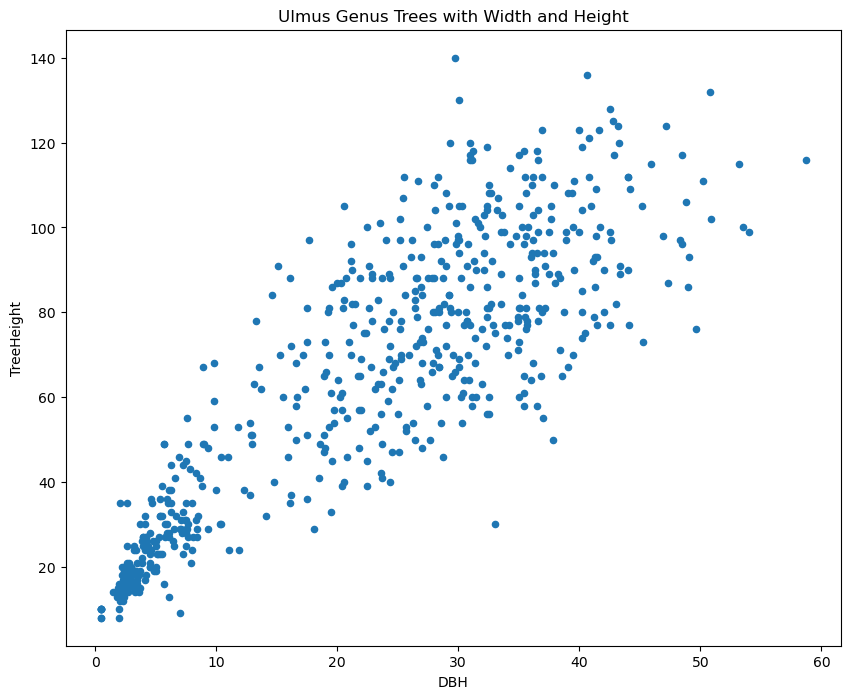

In [31]:
ulmus_trees = portland_trees[(portland_trees["Genus"]=="Ulmus")] #subsetting a small portion of our previously created dataframe (ulmus)

#use plot.scatter function to create a scatterlot for DBH and Tree Height 

ulmus_trees.plot.scatter(x='DBH', y='TreeHeight')
plt.title('Ulmus Genus Trees with Width and Height')

Graph 2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree 
height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the 
“Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

In [32]:
#download necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8] 

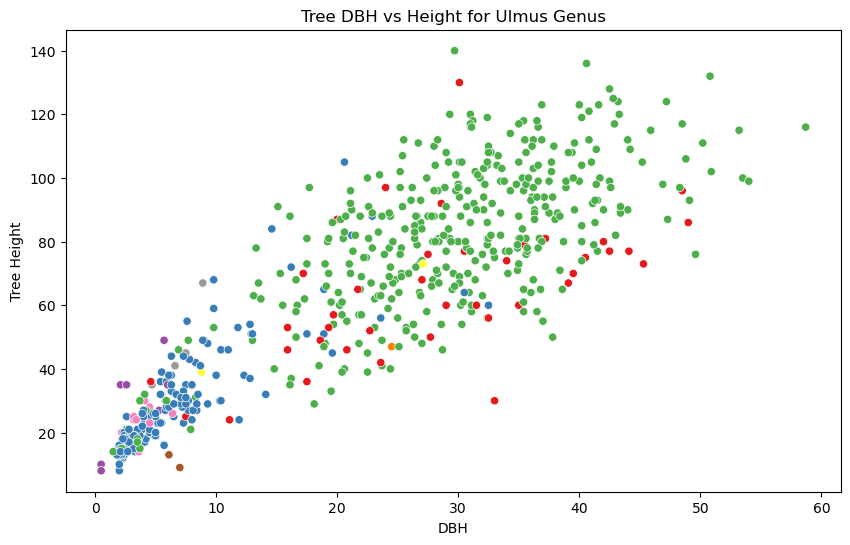

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#recreate the fucnction as above but use 'hue' to include the Genus_spec species on the graph

ulmus_trees = ulmus_trees[ulmus_trees['Genus'] == 'Ulmus']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ulmus_trees, x='DBH', y='TreeHeight', hue='Genus_spec', palette='Set1')

plt.title('Tree DBH vs Height for Ulmus Genus')
plt.xlabel('DBH')
plt.ylabel('Tree Height')

#make the legend false, to exclude it from the graph

plt.legend([], [], frameon=False)
plt.show()


G3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species 
should have its own boxplot)

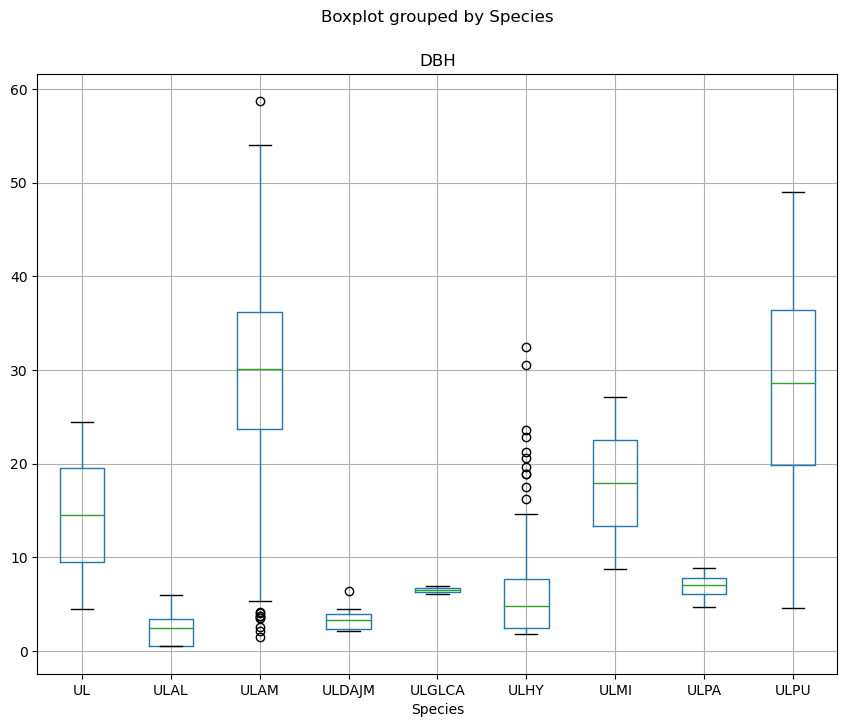

In [35]:
#use boxplot function to create a DBH and species boxplot graph
ulmus_trees.boxplot(column='DBH', by = 'Species',)
plt.show(ulmus_trees.boxplot)

G4: Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graph

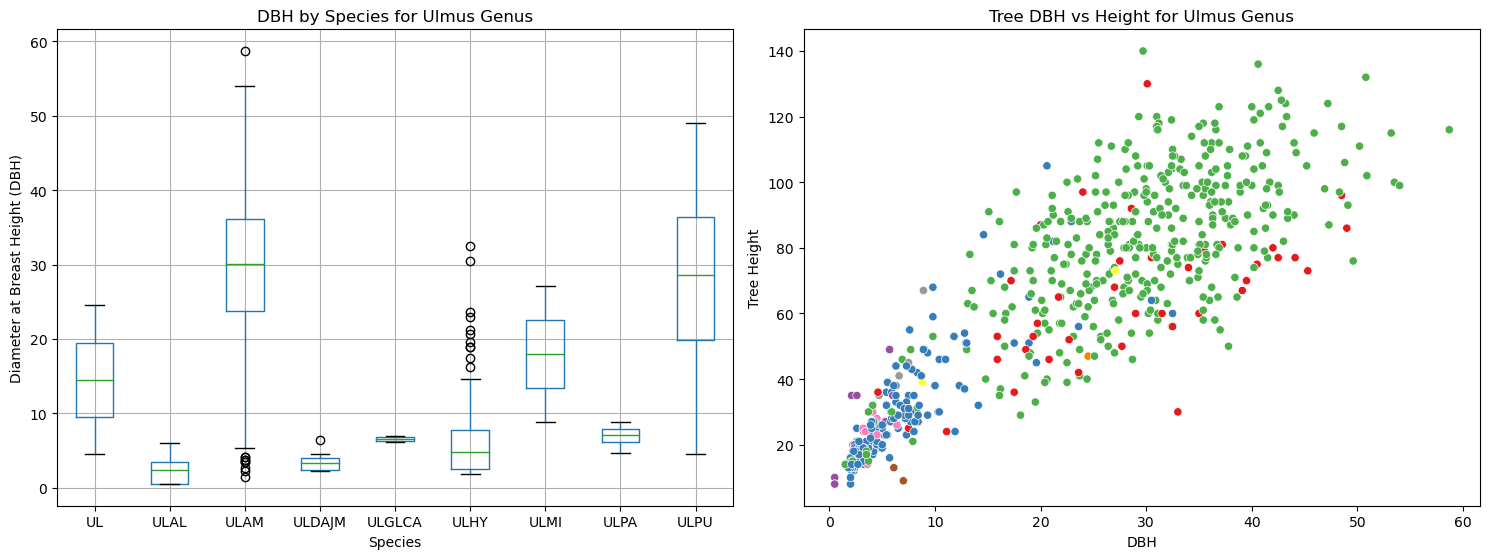

In [36]:
#combine the scatterplot and boxplot using plt.subplots
import seaborn as sns
import matplotlib.pyplot as plt

ulmus_trees = ulmus_trees[ulmus_trees['Genus'] == 'Ulmus']
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ulmus_trees.boxplot(column='DBH', by='Species', ax=axes[0])
axes[0].set_title('DBH by Species for Ulmus Genus')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Diameter at Breast Height (DBH)')


sns.scatterplot(data=ulmus_trees, x='DBH', y='TreeHeight', hue='Genus_spec', palette='Set1', ax=axes[1])
axes[1].set_title('Tree DBH vs Height for Ulmus Genus')
axes[1].set_xlabel('DBH')
axes[1].set_ylabel('Tree Height')


axes[1].legend([], [], frameon=False) #in order to not have a legend in either of the graphs 
plt.tight_layout()
plt.suptitle('')  
plt.show()


# Part 4: Python Geopandas

Task 1: read the data shapefile

In [37]:
pip install contextily

DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install mapclassify

DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.63 requires nvidia-ml-py3, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install geopandas

DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 74.5 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install folium

DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8]

In [42]:
#set directory to where data is 
directory= '/arcgis/home'

In [43]:
#read downloaded data file 'World Heritage Sites Scotland'
WHS_sites = gpd.read_file('/arcgis/home/WHS SCOTLAND/WHS_SCOTLAND.shp')
print(WHS_sites)

           NAME  PA_CODE   STATUS    SITE_HA  FEATURE_HA MPA_NETWOR  \
0      St Kilda     9159  Current   25467.58    25467.58          N   
1  Flow Country     9161  Current  187023.57    11387.14          N   
2  Flow Country     9161  Current  187023.57    42438.13          N   
3  Flow Country     9161  Current  187023.57    41733.56          N   
4  Flow Country     9161  Current  187023.57    75535.04          N   
5  Flow Country     9161  Current  187023.57     1490.93          N   
6  Flow Country     9161  Current  187023.57     8449.90          N   
7  Flow Country     9161  Current  187023.57     5988.86          N   

    GEOGRAPHIC     Shape_Leng    Shape_Area  \
0        MIXED   63900.238580  2.546758e+08   
1  TERRESTRIAL   71127.345661  1.138714e+08   
2  TERRESTRIAL  170889.221607  4.243813e+08   
3  TERRESTRIAL  258989.898638  4.173356e+08   
4  TERRESTRIAL  277248.928136  7.553504e+08   
5  TERRESTRIAL   16761.743424  1.490931e+07   
6  TERRESTRIAL   70614.487924  

In [44]:
dataset = '/arcgis/home/WHS SCOTLAND/WHS_SCOTLAND.shp'

Task 2: Use the correct code to plot the first 5 and last 5 of records in your selected dataset

<AxesSubplot: >

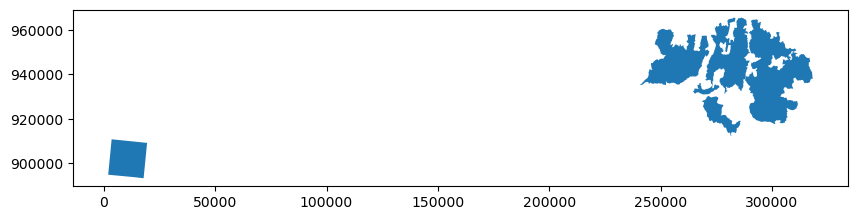

In [47]:
#define first 5 of WHS sites using head function, plot using .plot function
first_5= (WHS_sites.head())
first_5.plot()

<AxesSubplot: >

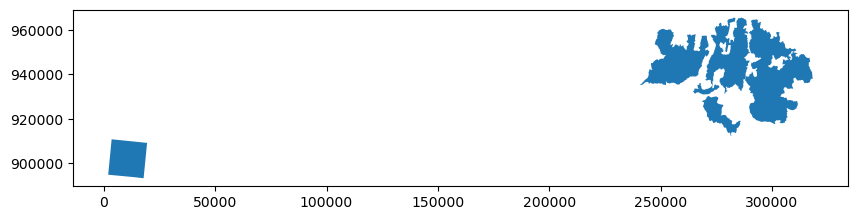

In [52]:
#define last 5 of WHS sites using head function, plot using .plot function
last_5= (WHS_sites.head())
last_5.plot()

Task 3: Create a map wheer you can explrore the selected dataset. Try to plot the mpa using some categorical attibute. Include a tooltip

In [178]:
#use tooltip to explore the attribute 'status'
WHS_sites.explore(tooltip='STATUS')


Task 4: What is the Coordinate Refrence System of the selected dataset?

.crs is the coordinate system 

Task 5: How many features does the selected dataset contain?

Contains 8 features as below


In [180]:
len (WHS_sites)

8

T6. Define a sub-setting filter to create a new geopandas dataframe where you filter the 
selected dataset based on a categorical attribute

- Categorical attribute chosen was geographical site type (terrestrial or mixed) 

In [197]:
#create subset for geographical site type as the categorical attribute 
geographic_sites = WHS_sites["GEOGRAPHIC"]
geographic_sites

0          MIXED
1    TERRESTRIAL
2    TERRESTRIAL
3    TERRESTRIAL
4    TERRESTRIAL
5    TERRESTRIAL
6    TERRESTRIAL
7    TERRESTRIAL
Name: GEOGRAPHIC, dtype: object

Task 7: Define a subsetting filter

In [198]:
#calculate shape length for WHS sites 
shape_length = WHS_sites["Shape_Leng"]
shape_length

0     63900.238580
1     71127.345661
2    170889.221607
3    258989.898638
4    277248.928136
5     16761.743424
6     70614.487924
7     48957.552206
Name: Shape_Leng, dtype: float64

Task 8: Plot the new/filtered geopandas dataframe where you filter the selected dataset based on a numerical attribute

Text(0.5, 1.0, 'Geographic WHS sites')

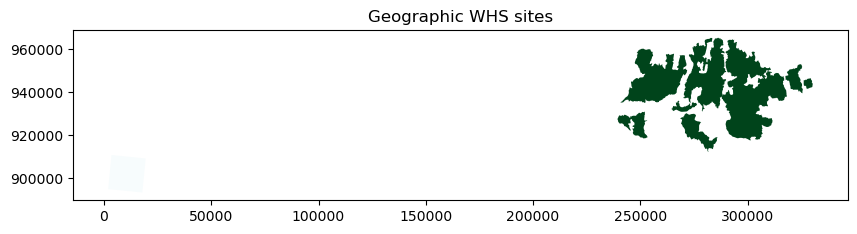

In [200]:
#plot 'geographic'alongside 'BuGu'
WHS_sites.plot(column='GEOGRAPHIC', cmap='BuGn')
plt.title('Geographic WHS sites')

# Part 5: Python Rasterio

In [202]:
pip install earthpy rasterio 

DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [278]:
import earthpy as et
import earthpy.spatial as es 
import earthpy.plot as ep

In [279]:
import matplotlib.pyplot as plt


In [280]:
pip install earthpy


DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


Task 1: read the datafile

In [281]:
#set directory to where data is stored 
dataset = '/arcgis/home/elev.tif'

In [282]:
#import rasterio library as this is raster data that needs to be read 
import rasterio as rio

In [283]:
#use rio.open to read the raster data 
with rio.open ('/arcgis/home/elev.tif') as dataset :
    elev=dataset.read ()
    print (elev)

[[[-32768 -32768 -32768 ... -32768 -32768 -32768]
  [-32768 -32768 -32768 ... -32768 -32768 -32768]
  [-32768 -32768 -32768 ... -32768 -32768 -32768]
  ...
  [-32768 -32768 -32768 ... -32768 -32768 -32768]
  [-32768 -32768 -32768 ... -32768 -32768 -32768]
  [-32768 -32768 -32768 ... -32768 -32768 -32768]]]


Task 2: What is the CRS of the data?

In [284]:
#create function to calculate CRS
elev = rio.open ('/arcgis/home/elev.tif')
print(elev.crs)

EPSG:32617


Task 3: Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset

- The bounds show the extent of our data on elevation
- Reference system is EPSG:32617 covering Canada (area where this elevation data is from) 
- There are X number of bands (FINISH LATER)


In [285]:
#create a function to calculate bounds
print(elev.bounds)

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)


Task 4: Create a plot/map of raster data 

In [286]:
#define array of elevation, read using .read function
elev_arr= elev.read(1)
elev_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

In [291]:
#use image_read_masked function for specificity
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))

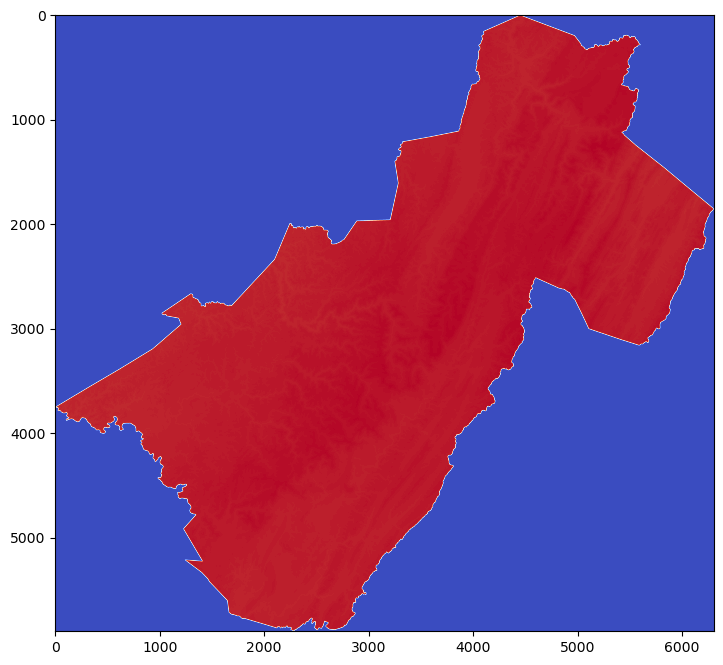

In [292]:
#use functions rcParams and imshow to create map of raster data 
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="coolwarm")




(<Figure size 1200x1200 with 1 Axes>,
 <AxesSubplot: title={'center': 'Histogram raster'}>)

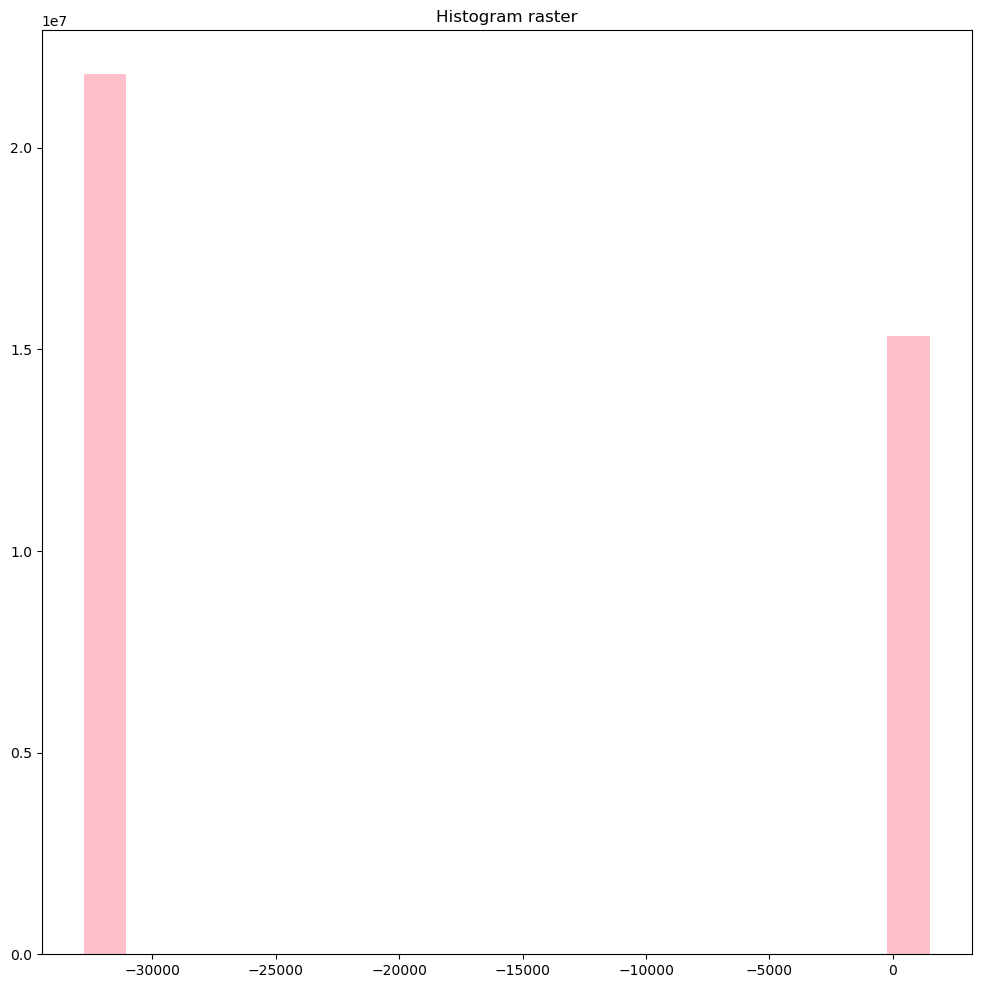

In [295]:
#use ep.hist function to create histogram 
ep.hist(image_read_masked, colors=['pink'], title='Histogram raster')